Pokémon Data Analysis using Python, Pandas & Matplotlib

This project analyzes the Pokémon dataset using Python.
I performed data cleaning, feature engineering, exploratory data analysis, and created visual insights.
The goal is to understand Pokémon characteristics, identify trends, and create meaningful summaries of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('pokemon_data.csv')

# Display first rows
df.head()


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


# Dataset Overview

Before cleaning, let's inspect the structure, missing values, and basic statistics.


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

# Data Cleaning

In this step, I:

- Filled missing values in the **Type 2** column  
- Removed duplicate rows  
- Verified dataset cleanliness  


In [3]:
# Fill missing Type 2 values
df['Type 2'] = df['Type 2'].fillna('None')

# Remove duplicates
df = df.drop_duplicates()

# Confirm cleaning
df.isnull().sum(), df.duplicated().sum()



(#             0
 Name          0
 Type 1        0
 Type 2        0
 HP            0
 Attack        0
 Defense       0
 Sp. Atk       0
 Sp. Def       0
 Speed         0
 Generation    0
 Legendary     0
 dtype: int64,
 np.int64(0))

# Feature Engineering

I created two new useful features:

# 1. **Total**
A combined score of all stats (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed)

#  2. **Is_Fast**
A boolean flag indicating whether Speed > 100


In [4]:
# Create Total stat
df['Total'] = df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].sum(axis=1)

# Create Is_Fast flag
df['Is_Fast'] = df['Speed'] > 100

df.head()


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total,Is_Fast
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,False
4,4,Charmander,Fire,None,39,52,43,60,50,65,1,False,309,False


# Exploratory Data Analysis (EDA)

Here I explore:

- Pokemon distribution by type  
- Strongest Pokemon  
- Average stats per type  
- Average stats per generation  


In [5]:
df['Type 1'].value_counts()


Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [6]:
df.sort_values('Total', ascending=False).head(10)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total,Is_Fast
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780,True
164,150,MewtwoMega Mewtwo Y,Psychic,None,106,150,70,194,120,140,1,True,780,True
422,382,KyogrePrimal Kyogre,Water,None,100,150,90,180,160,90,3,True,770,False
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,770,False
552,493,Arceus,Normal,None,120,120,120,120,120,120,4,True,720,True
418,380,LatiasMega Latias,Dragon,Psychic,80,100,120,140,150,110,3,True,700,True
494,445,GarchompMega Garchomp,Dragon,Ground,108,170,115,120,95,92,4,False,700,False
413,376,MetagrossMega Metagross,Steel,Psychic,80,145,150,105,110,110,3,False,700,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700,True


In [7]:
df.groupby('Type 1')['Total'].mean().sort_values(ascending=False)


Type 1
Dragon      550.531250
Steel       487.703704
Flying      485.000000
Psychic     475.947368
Fire        458.076923
Rock        453.750000
Dark        445.741935
Electric    443.409091
Ghost       439.562500
Ground      437.500000
Ice         433.458333
Water       430.455357
Grass       421.142857
Fighting    416.444444
Fairy       413.176471
Normal      401.683673
Poison      399.142857
Bug         378.927536
Name: Total, dtype: float64

In [8]:
df.groupby('Generation')['Total'].mean()


Generation
1    426.813253
2    418.283019
3    436.225000
4    459.016529
5    434.987879
6    436.378049
Name: Total, dtype: float64

# Visualizations

I created charts to visualize Pokemon characteristics:

- Type distribution  
- Speed distribution  
- Power trend across generations  


Bar chart — Pokemon type distribution

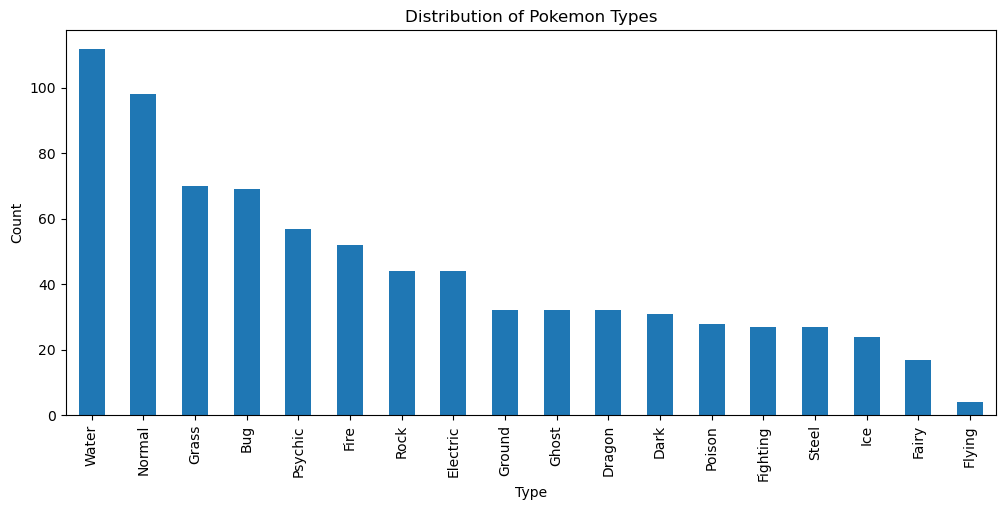

In [10]:
df['Type 1'].value_counts().plot(kind='bar', figsize=(12,5))
plt.title("Distribution of Pokemon Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


Boxplot — Speed distribution

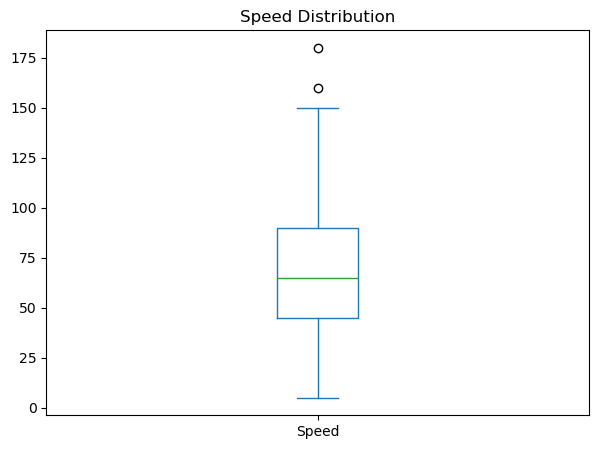

In [11]:
plt.figure(figsize=(7,5))
df['Speed'].plot(kind='box')
plt.title("Speed Distribution")
plt.show()


Line chart — Average Total per Generation

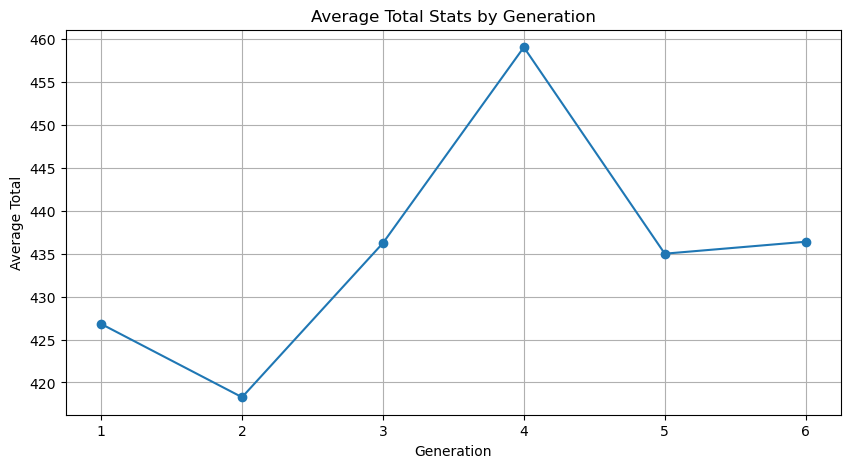

In [12]:
df.groupby('Generation')['Total'].mean().plot(kind='line', marker='o', figsize=(10,5))
plt.title("Average Total Stats by Generation")
plt.xlabel("Generation")
plt.ylabel("Average Total")
plt.grid(True)
plt.show()


# Export Cleaned Data

I exported the cleaned dataset and grouped summary for further analysis.


In [13]:
df.to_csv('cleaned_pokemon.csv', index=False)
df.groupby('Type 1')['Total'].mean().to_csv('avg_stats_by_type.csv')


# Conclusion

In this project, I:

- Cleaned and prepared the dataset  
- Engineered useful new features  
- Performed exploratory data analysis  
- Built visualizations  
- Exported cleaned datasets  

This project demonstrates practical skills in:
**Python, Pandas, NumPy, Matplotlib, data cleaning, analysis, and visualization**.

This notebook is part of my portfolio for data-related internships.
